# Função

In [2]:
#-----------------------------------------------------------------------------------
#        Obtêm as informações do radar a partir do dado bruto (HDF5)
#-----------------------------------------------------------------------------------
def get_info_radar(radar):

    """
    Obtêm as informações dos dados do radar

    Parâmetros de entrada:
                           radar (object): objeto do pyart

    Parâmetros de saída:
                         dic (dicionário): informações do radar, como:
                           date_start(list): ano, mês, dia hora, minuto inicial do scan do radar
                           date_end(list): ano, mês, dia hora, minuto final do scan do radar
                           lon_radar(float): longitude do radar em graus
                           lat_radar(float): latitude do radar em graus
                           alt_radar(float): altitude do radar em metros
                           radar_frequency(float): frequência do radar em Hz
                           radar_beam_width(float): largura do feixe em graus
                           nsweeps(int): quantidade de elevações
                           sweeps(list): ângulos de elevação em graus
                           nrays(list): quantidade de azimutes para cada elevação
                           ngates(int): quantidade de bins
                           radial_resolution(float): resolução radial do radar em metros
                           ray_angle_res(float): resolução azimutal em graus
                           lonmin(float): longitude mínima da matriz de dados
                           lonmax(float): longitude máxima da matriz de dados
                           latmin(float): latitude mínima da matriz de dados
                           latmax(float): latitude máxima da matriz de dados
                           variables(list): variáveis disponíveis

    Exemplo:
             dic = get_info_radar(radar)
    """

    # importa biblioteca de datas
    from netCDF4 import num2date

    # campos disponíveis
    variaveis = radar.fields.keys()

    # latitude e longitude do radar
    lon_radar, lat_radar, alt_radar = radar.longitude['data'][0], radar.latitude['data'][0], radar.altitude['data'][0]

    # informações sobre o tempo
    data_ini = num2date(radar.time['data'][0], radar.time['units'] )
    data_end = num2date(radar.time['data'][-1], radar.time['units'] )

    # extrai o ano, mes dia, hora e minuto inicial da imagem
    anoi, mesi, diai, hori, mini, segi = str(data_ini.year), str(data_ini.month).zfill(2), str(data_ini.day).zfill(2), str(data_ini.hour).zfill(2), str(data_ini.minute).zfill(2), str(data_ini.second).zfill(2)
    anof, mesf, diaf, horf, minf, segf = str(data_end.year), str(data_end.month).zfill(2), str(data_end.day).zfill(2), str(data_end.hour).zfill(2), str(data_end.minute).zfill(2), str(data_end.second).zfill(2)

    # frequência do radar
    radar_frequency = 10. #radar.instrument_parameters['frequency']['data'][0]

    # largura do feixe
    radar_beam_width = 0.96 # radar.instrument_parameters['radar_beam_width_h']['data'][0]

    # quantidade TOTAL de bins do feixe
    ngates = radar.ngates

    # quantidade de elevações
    nsweeps = radar.nsweeps

    # quantidade de azimutes por elevação
    total_azimuths = radar.azimuth['data'].shape[0]
    index_azimuths = radar.sweep_start_ray_index['data'].tolist()
    index_azimuths.append(total_azimuths)
    qte_azim = [index_azimuths[i+1] - index_azimuths[i] for i in range(nsweeps)]

    # resolução radial
    radial_resolution = radar.range['meters_between_gates']

    # informação apenas da resolução ângulo azimutal
    ray_angle_res = -999.9 #radar.ray_angle_res['data'][0]

    # ângulos de elevação
    sweeps =  radar.fixed_angle['data']

    # definindo a extensão dos dados em termos de latitude/longitude
    lats = radar.gate_latitude
    lons = radar.gate_longitude
    lonmin = lons['data'].min()
    lonmax = lons['data'].max()
    latmin = lats['data'].min()
    latmax = lats['data'].max()

    # coloca as variáveis num dicionário
    dic = {
            'date_start(year,month,day,hour,minute)': [anoi, mesi, diai, hori, mini],
            'date_end(year,month,day,hour,minute)': [anof, mesf, diaf, horf, minf],
            'lon_radar(degree)': lon_radar,
            'lat_radar(degree)': lat_radar,
            'alt_radar(meters)': alt_radar,
            'radar_frequency(Hz)': radar_frequency,
            'radar_beam_width(degree)': radar_beam_width,
            'nsweeps(#)': nsweeps,
            'sweeps(degree)': list(sweeps),
            'nrays(#)': qte_azim,
            'ngates(#)': ngates,
            'radial_resolution(meters)': radial_resolution,
            'ray_angle_res(degree)': ray_angle_res,
            'lonmin(degree)': lonmin,
            'lonmax(degree)': lonmax,
            'latmin(degree)': latmin,
            'latmax(degree)': latmax,
            'variables': list(variaveis)

           }
    #             'radar_beam_width(degree)': radar_beam_width,

    return dic

# leitura do arquivo
file = 'input/2023-02-19/R13227490_202405180003.hdf'
radar = pyart.aux_io.read_odim_h5(f'{file}')

# processa a função que extrai as infomações do dado do radar
dic = get_info_radar(radar)

# salva arquivo
with open('info_radar.csv', 'w') as f:
    for key in dic.keys():
        f.write("%s= %s\n"%(key, dic[key]))

# mostra as informações do radar na tela
dic

NameError: name 'pyart' is not defined

# Figura


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



RuntimeError: OGR Error: Unsupported SRS

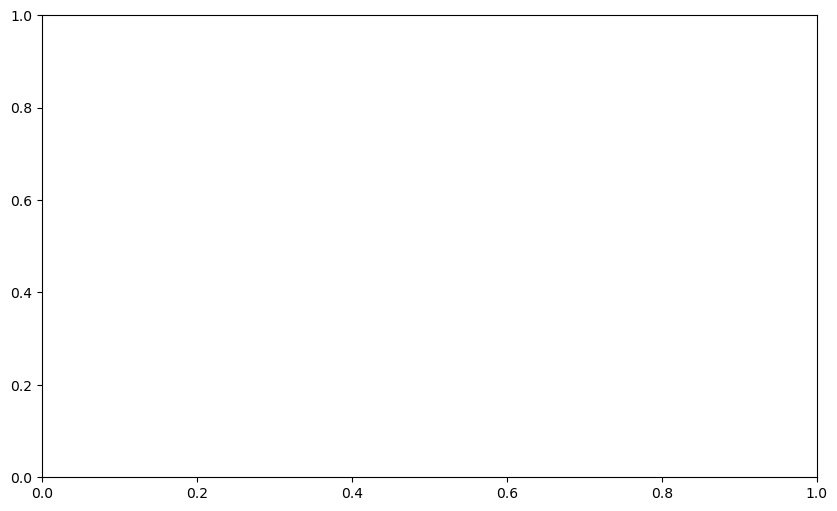

In [3]:
#========================================================================================================================#
#                                             IMPORTA BIBLIOTECAS
#========================================================================================================================#
import pyart                      # Biblioteca para trabalhar com dados de radar
import wradlib as wrl             # Biblioteca para trabalhar com dados de radar
import matplotlib.pyplot as plt   # Biblioteca para gerar gráficos
import numpy as np                # Biblioteca para trabalhar com matrizes
import wradlib as wrl             # Biblioteca para trabalhar com dados de radar

# ignora avisos
import warnings
warnings.filterwarnings("ignore")

#========================================================================================================================#
#                                             CAMINHO DOS DIRETÓRIOS
#========================================================================================================================#
dir_input = 'input/2023-02-19/'

#========================================================================================================================#
#                                             LEITURA DO DADO DE RADAR
#========================================================================================================================#
# leitura do arquivo
#filename = 'PNOVA2-20230219235502.HDF5'
#radar = pyart.aux_io.read_gamic(f'{dir_input}{filename}')

filename = 'R13227490_202405180003.hdf'
radar = pyart.aux_io.read_odim_h5(f'{dir_input}{filename}')

# extrai a latitude, longitude e altura do radar
lat_radar, lon_radar, alt_radar = radar.latitude['data'][0], radar.longitude['data'][0], radar.altitude['data'][0]

#========================================================================================================================#
#                                            INFORMAÇÕES A SEREM UTILIZADAS
#========================================================================================================================#
# quantidade total de bins do feixe
ngates = radar.ngates

# resolução radial do feixe
radial_resolution = radar.range['meters_between_gates']

# ângulos de elevação
sweeps = list(radar.fixed_angle['data'])

# distância de cada bin ao radar em metros
ranges = np.arange(ngates) * radial_resolution

# ângulo de abertura do feixe
radar_beam_width = 0.996   #radar.instrument_parameters['radar_beam_width_h']['data'][0] 

# coordenadas do radar (longitude, latitude, altitude)
sitecoords = (lon_radar, lat_radar, alt_radar)

#========================================================================================================================#
#                                                     PLOTA FIGURA
#========================================================================================================================#
# cria moldura da figura
fig, ax = plt.subplots(1,1,figsize=(10,6))

# define estilo do gráfico
plt.style.use('bmh')

# plota figura
wrl.vis.plot_scan_strategy(ranges,
                           sweeps,
                           sitecoords,
                           beamwidth=radar_beam_width,
                           vert_res = 1000.,
                           maxalt = 15000.,
                           range_res = 10000.,
                           maxrange = 250000.,
                           units='km',
                           ax=ax)

# configuração do gráfico
ax.set_title('Estratégia do Radar de Lontras (SC)')
ax.set_xlabel('Distância (km)')
ax.set_ylabel('Altura (km)')
ax.set_xticks(ax.get_xticks()[::2])
ax.grid()

# recorta figura
plt.tight_layout()

# salva figura
plt.savefig('output/02_estrategia_varredura/estrategia_varredura.png', dpi=300)